# Determinant QMC data visualization

## Are you testing or making plots?

In [412]:
SAVEPLOTS = True

## Load simulation data

In [416]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

NSITES = 96
dt = 0.0625
beta = 4.
L = 64
t = 1.
U = 8.
mu = 3.5
totalMCSweeps = 128
freq = 4
intsize = 16
geom = 15
ny = 4

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

## 8 x 8 square lattice

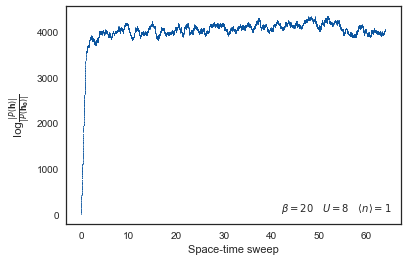

In [414]:
plt.figure(2)
weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
plt.plot([], [], label = r'$\beta =20 \quad U = 8 \quad \left\langle n \right\rangle = 1$', linewidth = 0)
plt.legend()

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights_N=' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '.png', dpi = 600)

## 8 x 4 tmdnr

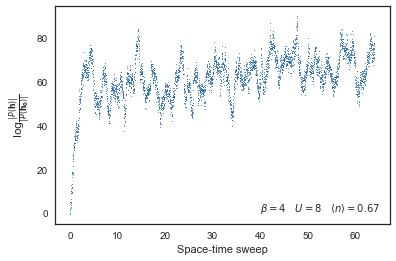

In [417]:
plt.figure(2)
weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
plt.plot([], [], label = r'$\beta =4 \quad U = 8 \quad \left\langle n \right\rangle = 0.67$', linewidth = 0)
plt.legend()

if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights_N=' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '.png', dpi = 600)

## 1D 36 sites

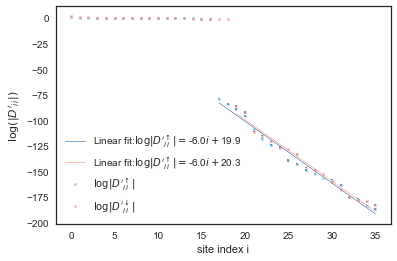

In [321]:
Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

logAbsDup = np.log(abs( Dup ) )

fitUp = np.polyfit(np.arange(len(logAbsDup[17:]))+ 17, logAbsDup[17:], 1, cov=True)
fit_fnUp = np.poly1d(fitUp[0]) 

sigUp = fitUp[1][1, 1]

errUp = abs((logAbsDup[17:] - fit_fnUp( np.arange(len(logAbsDup[17:])) + 17 )) / np.sqrt(sigUp))

Ddown = np.diag( np.loadtxt(simDir + "/Ddown.csv") )

logAbsDdown = np.log(abs( Ddown ) )

fitDown = np.polyfit(np.arange(len(logAbsDdown[19:]))+ 19, logAbsDdown[19:], 1, cov=True)
fit_fnDown = np.poly1d(fitDown[0]) 

sigDown = fitDown[1][1, 1]

errDown = abs((logAbsDdown[19:] - fit_fnDown( np.arange(len(logAbsDdown[19:])) + 19 )) / np.sqrt(sigDown))

plt.plot(np.arange(len(logAbsDup[17:])) + 17 , fit_fnUp( np.arange(len(logAbsDup[17:])) + 17 ), linewidth = 0.5,\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitUp[0][0]:.1f}'\
         + r'$i +$' + f'{fitUp[0][1]:.1f}' )
plt.errorbar(np.arange(len(logAbsDup[17:])) + 17 , logAbsDup[17:],\
             yerr=errUp, linewidth = 0, elinewidth = 2)

plt.plot(np.arange(len(logAbsDdown[19:])) + 19 , fit_fnDown( np.arange(len(logAbsDdown[19:])) + 19 ), linewidth = 0.5,\
         c = 'salmon',\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitDown[0][0]:.1f}'\
         + r'$i +$' + f'{fitDown[0][1]:.1f}' )

plt.errorbar(np.arange(len(logAbsDdown[19:])) + 19 , logAbsDdown[19:],\
             yerr=errDown, linewidth = 0, elinewidth = 2)

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
         linewidth = 0., label = r'$\log | {D^\prime}_{i\,i}^{\uparrow} |$')
plt.plot( logAbsDdown , marker = 'x', markersize = 0.5, markeredgewidth = 3, linewidth = 0., c = 'salmon'\
        , label = r'$\log | {D^\prime}_{i\,i}^{\downarrow} |$')
plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}| ) $')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/OrdersOfMagnitude_N=' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '.png', dpi = 600)

## Square PBC 64 sites

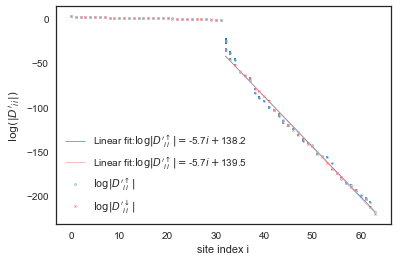

In [325]:
Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

logAbsDup = np.log(abs( Dup ) )

fitUp = np.polyfit(np.arange(len(logAbsDup[32:]))+ 32, logAbsDup[32:], 1, cov=True)
fit_fnUp = np.poly1d(fitUp[0]) 

sigUp = fitUp[1][1, 1]

errUp = abs((logAbsDup[32:] - fit_fnUp( np.arange(len(logAbsDup[32:])) + 32 )) / np.sqrt(sigUp))

Ddown = np.diag( np.loadtxt(simDir + "/Ddown.csv") )

logAbsDdown = np.log(abs( Ddown ) )

fitDown = np.polyfit(np.arange(len(logAbsDdown[32:]))+ 32, logAbsDdown[32:], 1, cov=True)
fit_fnDown = np.poly1d(fitDown[0]) 

sigDown = fitDown[1][1, 1]

errDown = abs((logAbsDdown[32:] - fit_fnDown( np.arange(len(logAbsDdown[32:])) + 32 )) / np.sqrt(sigDown))

plt.plot(np.arange(len(logAbsDup[32:])) + 32 , fit_fnUp( np.arange(len(logAbsDup[32:])) + 32 ), linewidth = 0.5,\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitUp[0][0]:.1f}'\
         + r'$i +$' + f'{fitUp[0][1]:.1f}' )
plt.errorbar(np.arange(len(logAbsDup[32:])) + 32 , logAbsDup[32:],\
             yerr=errUp, linewidth = 0, elinewidth = 2)

plt.plot(np.arange(len(logAbsDdown[32:])) + 32 , fit_fnDown( np.arange(len(logAbsDdown[32:])) + 32 ), linewidth = 0.5,\
         c = 'salmon',\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitDown[0][0]:.1f}'\
         + r'$i +$' + f'{fitDown[0][1]:.1f}' )

plt.errorbar(np.arange(len(logAbsDdown[32:])) + 32 , logAbsDdown[32:],\
             yerr=errDown, linewidth = 0, elinewidth = 2)

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
         linewidth = 0., label = r'$\log | {D^\prime}_{i\,i}^{\uparrow} |$')
plt.plot( logAbsDdown , marker = 'x', markersize = 0.5, markeredgewidth = 3, linewidth = 0., c = 'salmon'\
        , label = r'$\log | {D^\prime}_{i\,i}^{\downarrow} |$')
plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}| ) $')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/OrdersOfMagnitude_N=' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '.png', dpi = 600)

## TMD nanoribbon 96 sites

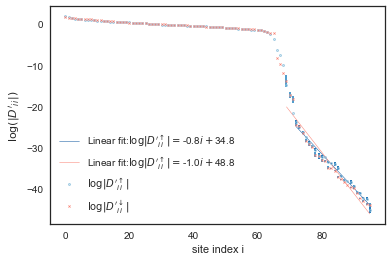

In [395]:
Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

logAbsDup = np.log(abs( Dup ) )

fitUp = np.polyfit(np.arange(len(logAbsDup[72:]))+ 72, logAbsDup[72:], 1, cov=True)
fit_fnUp = np.poly1d(fitUp[0]) 

sigUp = fitUp[1][1, 1]

errUp = abs((logAbsDup[72:] - fit_fnUp( np.arange(len(logAbsDup[72:])) + 72 )) / np.sqrt(sigUp))

Ddown = np.diag( np.loadtxt(simDir + "/Ddown.csv") )

logAbsDdown = np.log(abs( Ddown ) )

fitDown = np.polyfit(np.arange(len(logAbsDdown[69:]))+ 69, logAbsDdown[69:], 1, cov=True)
fit_fnDown = np.poly1d(fitDown[0]) 

sigDown = fitDown[1][1, 1]

errDown = abs((logAbsDdown[69:] - fit_fnDown( np.arange(len(logAbsDdown[69:])) + 69 )) / np.sqrt(sigDown))

plt.plot(np.arange(len(logAbsDup[72:])) + 72 , fit_fnUp( np.arange(len(logAbsDup[72:])) + 72 ), linewidth = 0.5,\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitUp[0][0]:.1f}'\
         + r'$i +$' + f'{fitUp[0][1]:.1f}' )
plt.errorbar(np.arange(len(logAbsDup[72:])) + 72 , logAbsDup[72:],\
             yerr=errUp, linewidth = 0, elinewidth = 2)

plt.plot(np.arange(len(logAbsDdown[69:])) + 69 , fit_fnDown( np.arange(len(logAbsDdown[69:])) + 69 ), linewidth = 0.5,\
         c = 'salmon',\
         label = r'Linear fit:' + r'$\log | {D^\prime}_{i\,i}^{\uparrow} | =$' + f'{fitDown[0][0]:.1f}'\
         + r'$i +$' + f'{fitDown[0][1]:.1f}' )

plt.errorbar(np.arange(len(logAbsDdown[69:])) + 69 , logAbsDdown[69:],\
             yerr=errDown, linewidth = 0, elinewidth = 2)

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
         linewidth = 0., label = r'$\log | {D^\prime}_{i\,i}^{\uparrow} |$')
plt.plot( logAbsDdown , marker = 'x', markersize = 0.5, markeredgewidth = 3, linewidth = 0., c = 'salmon'\
        , label = r'$\log | {D^\prime}_{i\,i}^{\downarrow} |$')
plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}| ) $')
plt.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/OrdersOfMagnitude_N=' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '.png', dpi = 600)

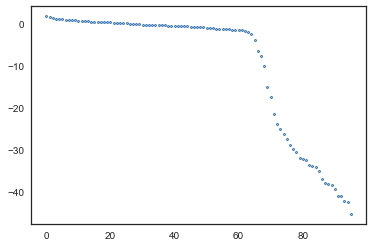

In [380]:
plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
         linewidth = 0., label = r'$\log | {D^\prime}_{i\,i}^{\uparrow} |$')

In [392]:
logAbsDdown[66:]

array([ -8.30431298,  -9.82177244, -11.89608035, -13.83265039,
       -17.23992031, -18.32394009, -24.45958062, -24.85230238,
       -26.46856198, -28.28200733, -29.13912027, -29.82291621,
       -31.71838927, -32.09130907, -33.09730245, -33.22614819,
       -34.9119445 , -35.05355883, -35.64417485, -37.22118227,
       -37.69357095, -38.36914921, -38.97704678, -39.56359588,
       -39.89107566, -40.89195809, -42.27833884, -43.00376752,
       -43.6960662 , -43.85688191])

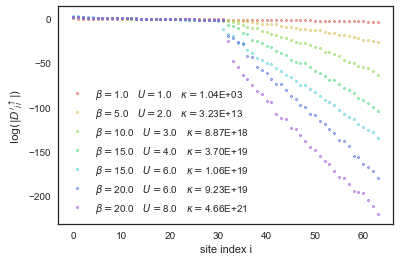

In [368]:
sns.set_palette(sns.color_palette("hls", 8))

NSITES = 64
dt = 0.0625
t = 1.
mu = 0.
totalMCSweeps = 128
freq = 4
geom = 3
ny = 0

beta = 1.
    
U = 1.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')

beta = 5.
    
U = 2.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')

plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}^{\uparrow}| ) $')
plt.legend()

beta = 10.
    
U = 3.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')
plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}^{\uparrow}| ) $')
plt.legend()


U = 4.

beta = 15.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')

beta = 15.

U = 6.
    
L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')


U = 6.

beta = 20.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')

beta = 20.
    
U = 8.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

Dup = np.diag( np.loadtxt(simDir + "/Dup.csv") )

kappa = np.loadtxt(simDir + "/kappaUpDown.csv")[0]

logAbsDup = np.log(abs( Dup ) )

plt.plot( logAbsDup , marker = 'o', markersize = 0.7, markeredgewidth = 2,\
     linewidth = 0., label = r'$\beta = $' + str(beta) + '$\quad U = $' + str(U)\
        + '$\quad \kappa = $' + f'{kappa:.2E}')
plt.xlabel(r'site index i')
plt.ylabel(r'$\log ( | {D^\prime}_{i\, i}^{\uparrow}| ) $')
plt.legend()

if SAVEPLOTS == True:
    plt.savefig('../DivergentScalesComparison', dpi = 600)

ValueError: x and y must be the same size

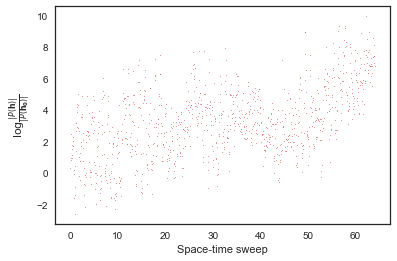

In [372]:
sns.set_palette(sns.color_palette("hls", 8))

NSITES = 64
dt = 0.0625
t = 1.
mu = 0.
totalMCSweeps = 128
freq = 4
geom = 3
ny = 0

beta = 1.
    
U = 1.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

beta = 5.
    
U = 2.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

beta = 10.
    
U = 3.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

U = 4.

beta = 15.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

beta = 15.

U = 6.
    
L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')


U = 6.

beta = 20.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

beta = 20.
    
U = 8.

L = int(beta / dt)
intsize = int(L / freq)

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

weights = np.loadtxt(simDir + '/Log-weights.csv')
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')

if SAVEPLOTS == True:
    plt.savefig('../ConvergenceComparison', dpi = 600)